<a href="https://colab.research.google.com/github/burlung97/Covid-Detection/blob/main/covid_detection_using_our_own_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.dropbox.com/s/ahk0ce1pkysxzpq/datasets.zip?dl=0

--2021-06-16 09:01:06--  https://www.dropbox.com/s/ahk0ce1pkysxzpq/datasets.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ahk0ce1pkysxzpq/datasets.zip [following]
--2021-06-16 09:01:07--  https://www.dropbox.com/s/raw/ahk0ce1pkysxzpq/datasets.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uccdfc4a7a5f6959162b9abd7ffb.dl.dropboxusercontent.com/cd/0/inline/BQjQiaGxTv3Ms_6bn9Q9kf_p1iI_igZEhAZFX8bIQFxm89SOQSVx221hLDlJBkkPy-rk-uiuLePYmssVXgSbeUs4-bidRovDjTlajJo2vmuQvNd6lL0gwBZMXAYuJjSwW-EgwkgsVROfxi0RCI8UQEue/file# [following]
--2021-06-16 09:01:07--  https://uccdfc4a7a5f6959162b9abd7ffb.dl.dropboxusercontent.com/cd/0/inline/BQjQiaGxTv3Ms_6bn9Q9kf_p1iI_igZEhAZFX8bIQFxm89SOQSVx221hLDlJBkkPy-rk-uiuLePYmssVXgSbe

In [ ]:
!unzip datasets.zip?dl=0

Archive:  datasets.zip?dl=0
   creating: datasets/
   creating: datasets/Train/
   creating: datasets/Train/COVID/
  inflating: datasets/Train/COVID/2020.02.28.20029025-p23-182.png  
  inflating: datasets/Train/COVID/2020.02.28.20029025-p23-183.png  
  inflating: datasets/Train/COVID/2020.03.01.20029769-p21-73_1%0.png  
  inflating: datasets/Train/COVID/2020.03.01.20029769-p21-73_1%1.png  
  inflating: datasets/Train/COVID/2020.03.01.20029769-p21-73_1%2.png  
  inflating: datasets/Train/COVID/2020.03.01.20029769-p21-73_2%0.png  
  inflating: datasets/Train/COVID/2020.03.01.20029769-p21-73_2%1.png  
  inflating: datasets/Train/COVID/2020.03.01.20029769-p21-73_2%2.png  
  inflating: datasets/Train/COVID/2020.03.01.20029769-p21-73_3.png  
  inflating: datasets/Train/COVID/2020.03.01.20029769-p21-73_4.png  
  inflating: datasets/Train/COVID/2020.03.03.20030353-p17-106%0.png  
  inflating: datasets/Train/COVID/2020.03.03.20030353-p17-106%1.png  
  inflating: datasets/Train/COVID/2020.03.03.

In [ ]:
TRAIN_PATH = "datasets/Train"
VAL_PATH = "datasets/Validation"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [ ]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
test_dataset = image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    'datasets/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')


Found 526 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'COVID': 0, 'NON_COVID': 1}

In [ ]:
validation_generator = test_dataset.flow_from_directory(
    'datasets/Validation',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 220 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=4,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
4/4 [==============================] - 2s 743ms/step - loss: 0.6334 - accuracy: 0.6091 - val_loss: 0.6759 - val_accuracy: 0.5156
Epoch 2/10
4/4 [==============================] - 2s 579ms/step - loss: 0.6468 - accuracy: 0.5938 - val_loss: 0.6899 - val_accuracy: 0.5312
Epoch 3/10
4/4 [==============================] - 2s 603ms/step - loss: 0.6127 - accuracy: 0.6250 - val_loss: 0.6864 - val_accuracy: 0.4531
Epoch 4/10
4/4 [==============================] - 2s 594ms/step - loss: 0.6198 - accuracy: 0.5938 - val_loss: 0.7077 - val_accuracy: 0.4375
Epoch 5/10
4/4 [==============================] - 2s 538ms/step - loss: 0.6723 - accuracy: 0.5818 - val_loss: 0.6872 - val_accuracy: 0.4375
Epoch 6/10
4/4 [==============================] - 2s 629ms/step - loss: 0.6166 - accuracy: 0.6953 - val_loss: 0.6966 - val_accuracy: 0.4531
Epoch 7/10
4/4 [==============================] - 2s 662ms/step - loss: 0.6499 - accuracy: 0.5703 - val_loss: 0.7107 - val_accuracy: 0.4219
Epoch 8/10
4/4 [====

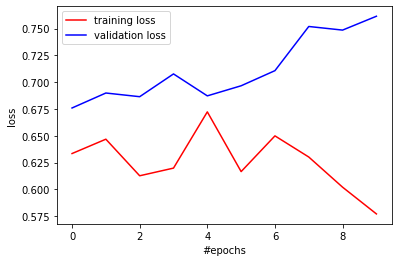

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],'b',label='validation loss')
plt.xlabel('#epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


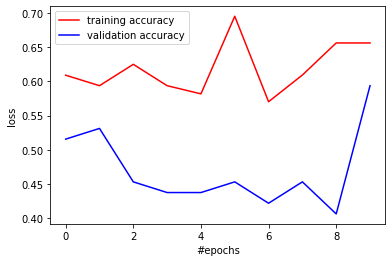

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],'b',label='validation accuracy')
plt.xlabel('#epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [ ]:
model.save("model_adv.h5")

In [ ]:
model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.6262877583503723, 0.5931559205055237]

In [ ]:
model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.7561820149421692, 0.5272727012634277]

In [ ]:
model=load_model('model_adv.h5')

In [ ]:
import os

In [ ]:
 train_generator.class_indices

{'COVID': 0, 'NON_COVID': 1}

In [ ]:
x_test=[]
y_test=[]


In [ ]:
for i in os.listdir('/content/datasets/Validation/NON_COVID/'):
  img=image.load_img('/content/datasets/Validation/NON_COVID/'+i,target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  x_test.append(1)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
for i in os.listdir('/content/datasets/Validation/COVID/'):
  img=image.load_img('/content/datasets/Validation/COVID/'+i,target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  x_test.append(0)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
x_test=np.array(x_test)
y_test=np.array(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


cm=confusion_matrix(x_test,y_test)

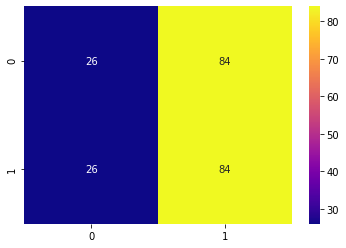

In [ ]:
sns.heatmap(cm,cmap="plasma",annot=True)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(x_test,y_test))

              precision    recall  f1-score   support

           0       0.50      0.24      0.32       110
           1       0.50      0.76      0.60       110

    accuracy                           0.50       220
   macro avg       0.50      0.50      0.46       220
weighted avg       0.50      0.50      0.46       220

